In [32]:
import json
import numpy as np
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt


### Read Data


In [9]:
with open(r'../data/json/closure.json', encoding='utf8', mode='r') as f:
    data = json.load(f)


### Extract Data Feature


In [75]:
CognitiveData_Cold = []
CognitiveData_Hot = []
CognitiveData = []
for i in data.keys():
    temp = list(data[i]['cognitiveData_Cold'].values())
    temp_hot = list(data[i]['cognitiveData_Hot'].values())
    CognitiveData_Cold.append(temp)
    CognitiveData_Hot.append(temp_hot)
    temp.extend(temp_hot)
    CognitiveData.append(temp)
CognitiveData_Cold = np.array(CognitiveData_Cold)
CognitiveData_Hot = np.array(CognitiveData_Hot)
CognitiveData = np.array(CognitiveData)
CognitiveData.shape


(103, 14)

### Model


In [81]:
kmeans_CognitiveData_Cold = KMeans(n_clusters=2, random_state=0).fit(CognitiveData_Cold)
kmeans_CognitiveData_Hot = KMeans(n_clusters=2, random_state=0).fit(CognitiveData_Hot)
kmeans_CognitiveData = KMeans(n_clusters=2, random_state=0).fit(CognitiveData)


In [38]:
CognitiveData_Cold[:, 1].shape


(103,)

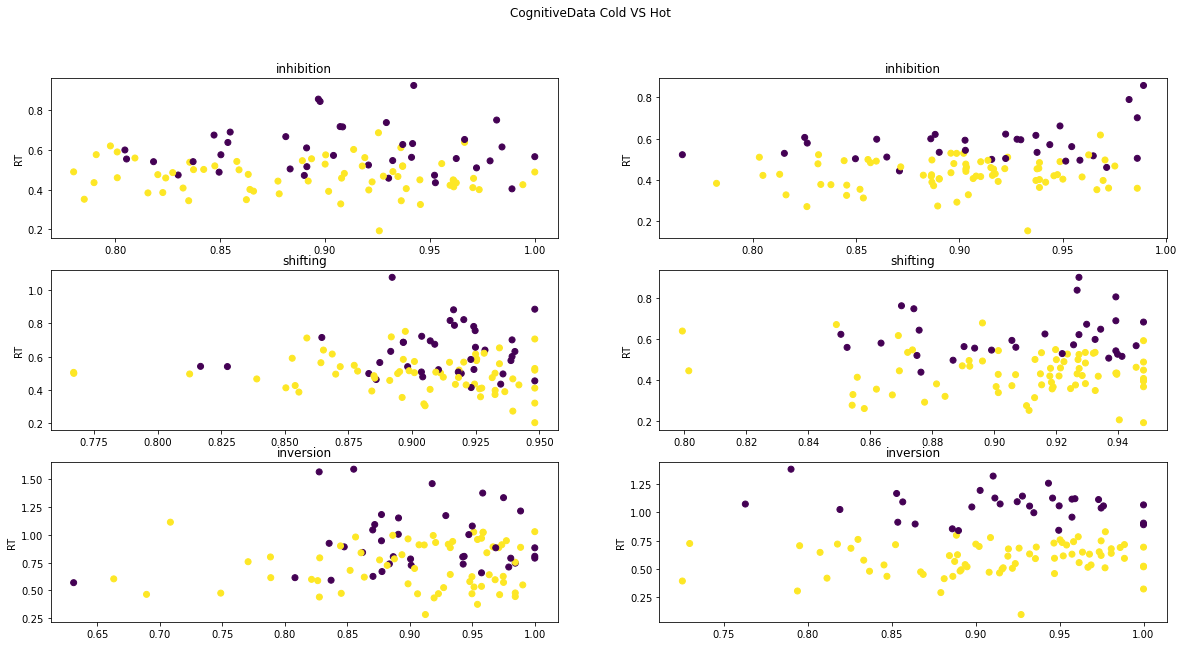

In [89]:
title = ['inhibition', 'shifting', 'inversion']
plt.figure(figsize=(20, 10))
plt.suptitle("CognitiveData Cold VS Hot")
for i in range(0, 6, 2):
    plt.subplot(3, 2, i+1)
    plt.title(title[int((i+1)/2)])
    plt.ylabel("RT")
    plt.scatter(CognitiveData_Cold[:, i], CognitiveData_Cold[:,i+1], c = kmeans_CognitiveData_Cold.labels_)
    plt.subplot(3, 2, i+2)
    plt.title(title[int((i+1)/2)])
    plt.ylabel("RT")
    plt.scatter(CognitiveData_Hot[:, i], CognitiveData_Hot[:,i+1], c = kmeans_CognitiveData_Hot.labels_)


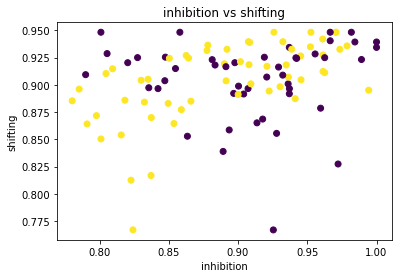

In [50]:
plt.title("inhibition vs shifting")
plt.xlabel("inhibition")
plt.ylabel("shifting")
plt.scatter(CognitiveData_Cold[:, 0], CognitiveData_Cold[:,
            2], c=kmeans_CognitiveData_Cold.labels_)


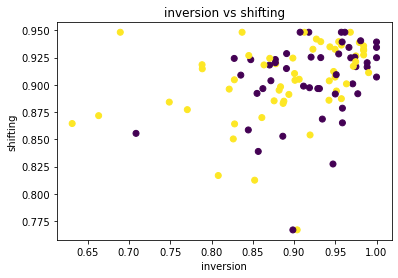

In [51]:
plt.title("inversion vs shifting")
plt.xlabel("inversion")
plt.ylabel("shifting")
plt.scatter(CognitiveData_Cold[:, 4], CognitiveData_Cold[:,2], c=kmeans_CognitiveData_Cold.labels_)
